# 1. Introduction
The second-hand car market is vast, and predicting the price of a used car is a challenging task due to various factors influencing the price. Feature engineering and dimensionality reduction play a crucial role in improving the performance of predictive models by enhancing the quality of input data and reducing noise.

# 2. Dataset Overview
We will use a second-hand car sales dataset containing features such as make, model, year, mileage, state, price, etc. The dataset can be obtained from public repositories like Kaggle or scraped from online car listing websites.

# 3. Data Preprocessing
### 3.1. Loading the Data
### 3.2. Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import warnings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')

df = pd.read_csv('second_hand_cars.csv')
print(df.head())

missing_values = df.isnull().sum()
print(missing_values)

df['Variant'].fillna('No variant', inplace=True)
df['Accessories'].fillna('No accessories', inplace=True)
df['Registration Certificate'].fillna('Not Available', inplace=True)
df['Service Record'].fillna('No Service Record', inplace=True)

print('Missing values have been handled.')

print(f'Number of duplicate rows found: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

    Company Name Car Name   Variant Fuel Type     Tyre Condition  Make Year  \
0  Maruti Suzuki    Cruze        EX       CNG  Needs Replacement       2018   
1            Kia   Seltos       RXE    Petrol                New       2020   
2            Kia   Accord       RXE    Petrol                New       2022   
3         Nissan   Seltos  Highline    Diesel               Used       2024   
4      Chevrolet     Kwid  Highline    Petrol               Used       2018   

  Owner Type Registration Number  Mileage   Price      Transmission Type  \
0     Second         84-436-5584    52798  759107                 Manual   
1      Third         79-114-3166    43412  505071              Automatic   
2     Second         41-358-3344    95219  635322  Automatic (Tiptronic)   
3      Third         92-708-1763    70370  483152  Automatic (Tiptronic)   
4     Second         76-154-5485    85852  712961  Automatic (Tiptronic)   

  Body Color              Service Record             Insurance  \
0 

# 4. Feature Engineering
### 4.1. Creating New Features
### 4.2. Encoding Categorical Features
### 4.3. Feature Scaling

In [14]:
current_year = 2025
df['Car Age'] = current_year - df['Make Year']

df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=True).astype(float).astype(int)
df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '', regex=True).astype(float).astype(int)
df['Price per Mile'] = df['Price'] / df['Mileage']
df['Price per Mile'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Price per Mile'].fillna(0, inplace=True)

categorical_cols = ['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition', 'Owner Type', 'Transmission Type', 'Body Color', 'Service Record', 'Insurance', 'Registration Certificate', 'Accessories']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numerical_cols = ['Car Age', 'Mileage', 'Price', 'Price per Mile']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 5. Dimensionality Reduction
### 5.1. Correlation Analysis
### 5.2. Principal Component Analysis (PCA)

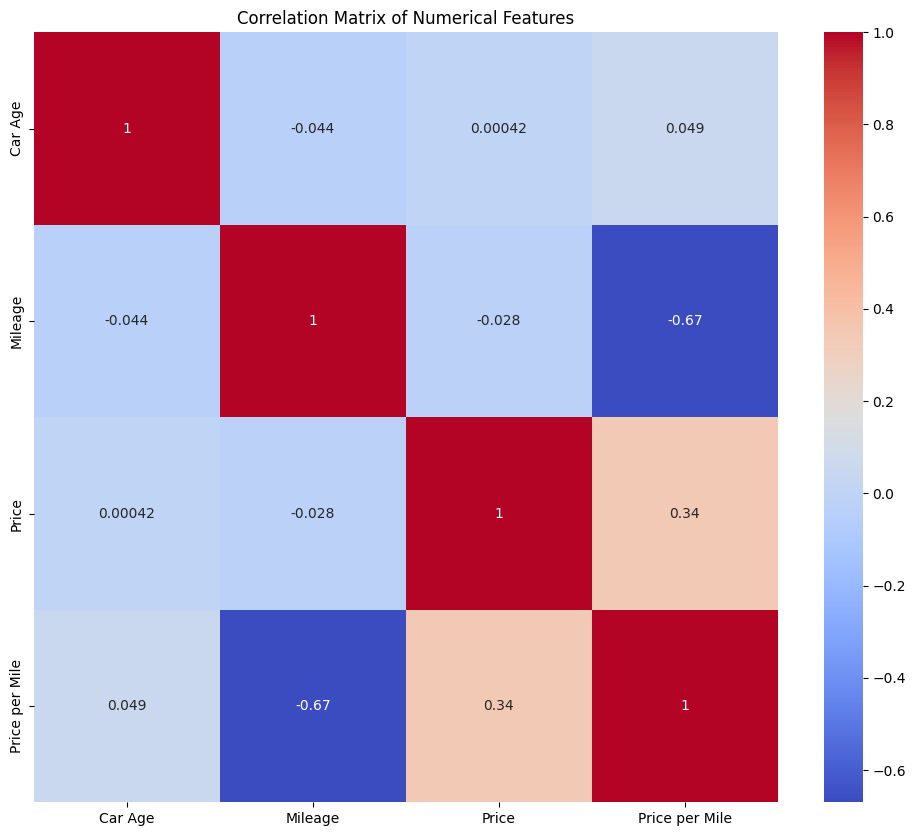

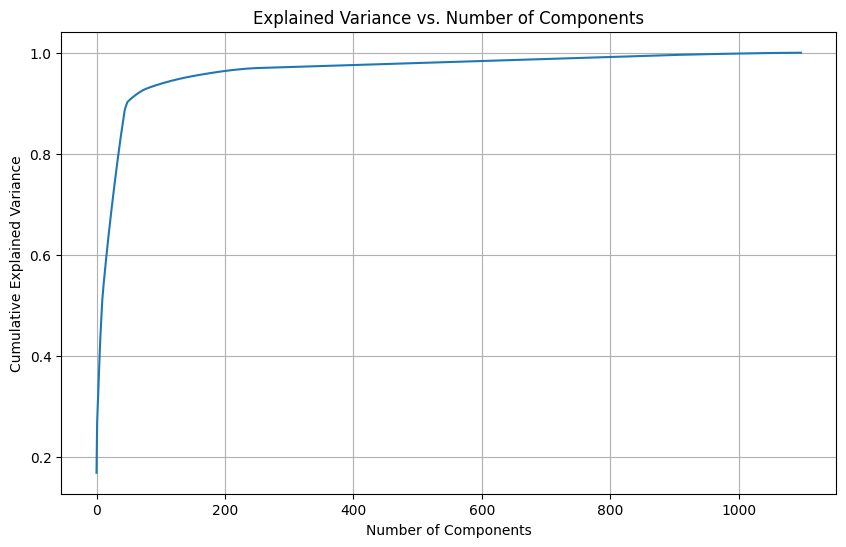

Number of components after PCA: 137
Shape of data after PCA: (2500, 137)


In [15]:
plt.figure(figsize=(12, 10))
corr_matrix = df_encoded[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            highly_correlated_features.append(colname)
highly_correlated_features = list(set(highly_correlated_features))

df_pca = df_encoded.drop(columns=['Make Year', 'Registration Number'], axis=1)
X = df_pca.drop('Price', axis=1)
y = df_pca['Price']
pca = PCA().fit(X)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f'Number of components after PCA: {pca.n_components_}')
print(f'Shape of data after PCA: {X_pca.shape}')

# 6. Modeling and Evaluation
### 6.1. Train-Test Split
### 6.2. Model Selection

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared ($R^2$): {r2:.2f}')

Mean Squared Error (MSE): 0.90
R-squared ($R^2$): 0.13
